# Model Comparison Scripts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import seaborn as sns
import json

from datetime import datetime
from PIL import Image
from statistics import mean
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

In [2]:
# Homemade Utility Classes
from pytorch_vision_utils.Utilities import clear_dirs, time_to_predict, DataVisualizationUtilities, TrainingUtilities

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using: ", device)

Using:  cuda:0


In [4]:
# DIRECTORY NAMES
cwd = os.getcwd()
TEST_DIR = str(os.path.join(cwd, "test_data"))
MODEL_DIR = str(os.path.join(cwd, "saved_models"))
MEDIA_DIR = str(os.path.join(cwd, 'media'))
INC_DIR = str(os.path.join(MEDIA_DIR, 'incorrect_images'))
MOBILENETV2 = "" # model name is initialized to mobilenet v2
XCEPTION = MODEL_NAME = ""
CONSTANT = 1.5

# Create models for Comparison

In [5]:
%run -m pytorch_vision_utils.train -- --model_name "xception" --parameters_path "parameters.json" --debug "True"

Using:  cuda
{'BATCH_SIZE': 16, 'ETA': 0.0001, 'PATIENCE': 7, 'CROP_SIZE': 299, 'DEGREES': 20, 'HUE': 0.3, 'BRIGHTNESS': 0.2, 'SATURATION': 0.2, 'CONTRAST': 0.2, 'MONITOR': 'val_loss', 'MIN_DELTA': 0, 'LR_PATIENCE': 5, 'FACTOR': 0.5, 'INPUT_SIZE': [299, 299], 'MEAN': [0.5, 0.5, 0.5], 'STD': [0.5, 0.5, 0.5]}
XceptionWrapper(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU(inplace=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU(inplace=True)
  (block1): Block(
    (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(2, 2), bias=False)
    (skipbn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (rep): Sequential(
      (0): SeparableConv2d(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3),

Using:  cuda
{'BATCH_SIZE': 32, 'ETA': 0.0001, 'PATIENCE': 7, 'CROP_SIZE': 224, 'DEGREES': 20, 'HUE': 0.3, 'BRIGHTNESS': 0.2, 'SATURATION': 0.2, 'CONTRAST': 0.2, 'MONITOR': 'val_loss', 'MIN_DELTA': 0, 'LR_PATIENCE': 5, 'FACTOR': 0.5, 'INPUT_SIZE': [224, 224], 'MEAN': [0.485, 0.456, 0.406], 'STD': [0.229, 0.224, 0.225]}
MobileNetV2Wrapper(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
        (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (4): BatchNorm2d(16, eps=1e-05, 

Train:   0%|          | 0/233 [00:00<?, ?it/s]


Epoch 1.1


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: inf

Train Loss: 0.565   | Train Acc: 0.6804  | Val Loss: 0.528   | Val Acc: 0.7442
Early Stopping Patience at: 0

Epoch 1.2


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.5277

Train Loss: 0.520   | Train Acc: 0.7355  | Val Loss: 0.472   | Val Acc: 0.7974
Early Stopping Patience at: 0

Epoch 1.3


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.4717

Train Loss: 0.487   | Train Acc: 0.7574  | Val Loss: 0.499   | Val Acc: 0.7904
Early Stopping Patience at: 1

Epoch 1.4


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.4717

Train Loss: 0.448   | Train Acc: 0.7850  | Val Loss: 0.369   | Val Acc: 0.8323
Early Stopping Patience at: 0

Epoch 1.5


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.3694

Train Loss: 0.396   | Train Acc: 0.8196  | Val Loss: 0.318   | Val Acc: 0.8641
Early Stopping Patience at: 0

Epoch 1.6


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.3176

Train Loss: 0.361   | Train Acc: 0.8444  | Val Loss: 0.311   | Val Acc: 0.8780
Early Stopping Patience at: 0

Epoch 1.7


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.3109

Train Loss: 0.329   | Train Acc: 0.8579  | Val Loss: 0.233   | Val Acc: 0.9081
Early Stopping Patience at: 0

Epoch 1.8


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.2328

Train Loss: 0.294   | Train Acc: 0.8747  | Val Loss: 0.206   | Val Acc: 0.9232
Early Stopping Patience at: 0

Epoch 1.9


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.2059

Train Loss: 0.265   | Train Acc: 0.8917  | Val Loss: 0.171   | Val Acc: 0.9447
Early Stopping Patience at: 0

Epoch 1.10


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.1712

Train Loss: 0.221   | Train Acc: 0.9098  | Val Loss: 0.146   | Val Acc: 0.9463
Early Stopping Patience at: 0

Epoch 1.11


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.1463

Train Loss: 0.203   | Train Acc: 0.9207  | Val Loss: 0.141   | Val Acc: 0.9522
Early Stopping Patience at: 0

Epoch 1.12


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.1405

Train Loss: 0.182   | Train Acc: 0.9249  | Val Loss: 0.232   | Val Acc: 0.8990
Early Stopping Patience at: 1

Epoch 1.13


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.1405

Train Loss: 0.168   | Train Acc: 0.9312  | Val Loss: 0.138   | Val Acc: 0.9506
Early Stopping Patience at: 0

Epoch 1.14


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.1385

Train Loss: 0.155   | Train Acc: 0.9410  | Val Loss: 0.094   | Val Acc: 0.9688
Early Stopping Patience at: 0

Epoch 1.15


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0938

Train Loss: 0.140   | Train Acc: 0.9464  | Val Loss: 0.104   | Val Acc: 0.9602
Early Stopping Patience at: 1

Epoch 1.16


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0938

Train Loss: 0.135   | Train Acc: 0.9500  | Val Loss: 0.073   | Val Acc: 0.9726
Early Stopping Patience at: 0

Epoch 1.17


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0726

Train Loss: 0.123   | Train Acc: 0.9526  | Val Loss: 0.079   | Val Acc: 0.9699
Early Stopping Patience at: 1

Epoch 1.18


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0726

Train Loss: 0.111   | Train Acc: 0.9573  | Val Loss: 0.060   | Val Acc: 0.9731
Early Stopping Patience at: 0

Epoch 1.19


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0598

Train Loss: 0.102   | Train Acc: 0.9618  | Val Loss: 0.062   | Val Acc: 0.9796
Early Stopping Patience at: 1

Epoch 1.20


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0598

Train Loss: 0.097   | Train Acc: 0.9633  | Val Loss: 0.048   | Val Acc: 0.9828
Early Stopping Patience at: 0

Epoch 1.21


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.096   | Train Acc: 0.9651  | Val Loss: 0.054   | Val Acc: 0.9812
Early Stopping Patience at: 1

Epoch 1.22


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.088   | Train Acc: 0.9675  | Val Loss: 0.070   | Val Acc: 0.9683
Early Stopping Patience at: 2

Epoch 1.23


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.074   | Train Acc: 0.9726  | Val Loss: 0.048   | Val Acc: 0.9828
Early Stopping Patience at: 3

Epoch 1.24


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.071   | Train Acc: 0.9726  | Val Loss: 0.081   | Val Acc: 0.9640
Early Stopping Patience at: 4

Epoch 1.25


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.077   | Train Acc: 0.9729  | Val Loss: 0.055   | Val Acc: 0.9833
Early Stopping Patience at: 5

Epoch 1.26


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Epoch    26: reducing learning rate of group 0 to 5.0000e-05.
Loss to beat: 0.0477

Train Loss: 0.060   | Train Acc: 0.9786  | Val Loss: 0.050   | Val Acc: 0.9812
Early Stopping Patience at: 6

Epoch 1.27


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0477

Train Loss: 0.046   | Train Acc: 0.9836  | Val Loss: 0.031   | Val Acc: 0.9876
Early Stopping Patience at: 0

Epoch 1.28


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0313

Train Loss: 0.041   | Train Acc: 0.9847  | Val Loss: 0.039   | Val Acc: 0.9855
Early Stopping Patience at: 1

Epoch 1.29


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0313

Train Loss: 0.042   | Train Acc: 0.9860  | Val Loss: 0.042   | Val Acc: 0.9790
Early Stopping Patience at: 2

Epoch 1.30


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0313

Train Loss: 0.043   | Train Acc: 0.9849  | Val Loss: 0.024   | Val Acc: 0.9903
Early Stopping Patience at: 0

Epoch 1.31


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0244

Train Loss: 0.036   | Train Acc: 0.9866  | Val Loss: 0.026   | Val Acc: 0.9930
Early Stopping Patience at: 1

Epoch 1.32


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0244

Train Loss: 0.034   | Train Acc: 0.9883  | Val Loss: 0.029   | Val Acc: 0.9887
Early Stopping Patience at: 2

Epoch 1.33


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0244

Train Loss: 0.036   | Train Acc: 0.9867  | Val Loss: 0.028   | Val Acc: 0.9909
Early Stopping Patience at: 3

Epoch 1.34


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0244

Train Loss: 0.033   | Train Acc: 0.9879  | Val Loss: 0.023   | Val Acc: 0.9919
Early Stopping Patience at: 0

Epoch 1.35


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0233

Train Loss: 0.030   | Train Acc: 0.9897  | Val Loss: 0.041   | Val Acc: 0.9844
Early Stopping Patience at: 1

Epoch 1.36


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0233

Train Loss: 0.034   | Train Acc: 0.9883  | Val Loss: 0.029   | Val Acc: 0.9919
Early Stopping Patience at: 2

Epoch 1.37


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0233

Train Loss: 0.026   | Train Acc: 0.9909  | Val Loss: 0.032   | Val Acc: 0.9919
Early Stopping Patience at: 3

Epoch 1.38


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0233

Train Loss: 0.025   | Train Acc: 0.9923  | Val Loss: 0.028   | Val Acc: 0.9833
Early Stopping Patience at: 4

Epoch 1.39


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Loss to beat: 0.0233

Train Loss: 0.026   | Train Acc: 0.9911  | Val Loss: 0.031   | Val Acc: 0.9823
Early Stopping Patience at: 5

Epoch 1.40


Train:   0%|          | 0/233 [00:00<?, ?it/s]

Epoch    40: reducing learning rate of group 0 to 2.5000e-05.
Loss to beat: 0.0233

Train Loss: 0.022   | Train Acc: 0.9925  | Val Loss: 0.042   | Val Acc: 0.9801
Early Stopping Patience at: 6

Epoch 1.41


Test: 100%|##########| 59/59 [00:02<00:00, 22.44it/s]


Loss to beat: 0.0233

Train Loss: 0.022   | Train Acc: 0.9919  | Val Loss: 0.042   | Val Acc: 0.9839
Early Stopping Patience at: 7


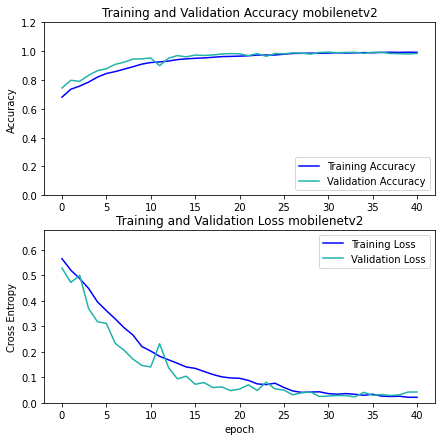

Classification Report

              precision    recall  f1-score   support

         N/A       0.96      1.00      0.98      4651
     TOWAWAY       1.00      0.96      0.98      4651

    accuracy                           0.98      9302
   macro avg       0.98      0.98      0.98      9302
weighted avg       0.98      0.98      0.98      9302

Confusion Matrix


C:\Users\nicol\Anaconda3\envs\torch_base\lib\site-packages\pytorch_vision_utils\Utilities.py:396: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).to(device, dtype=torch.long)


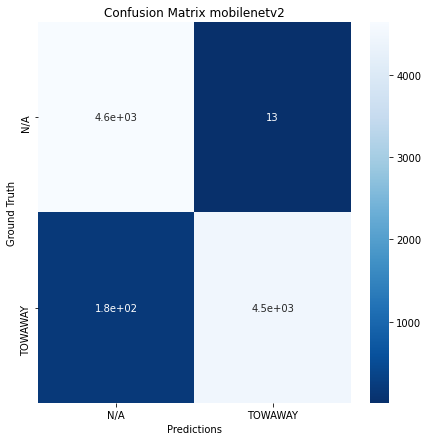

Average Loss: 0.02332  |  Average Accuracy: 0.99194


In [ ]:
%run -m pytorch_vision_utils.train -- --model_name "mobilenetv2" --parameters_path "parameters.json" --debug "True"

In [ ]:
train_utils = TrainingUtilities(data_dir=TEST_DIR, model_dir=MODEL_DIR, 
                                model_name="mobilenetv2", mode="test")
dataviz_utils = DataVisualizationUtilities()
clear_dirs(INC_DIR)

{'BATCH_SIZE': 32, 'ETA': 0.0001, 'PATIENCE': 7, 'CROP_SIZE': 224, 'DEGREES': 20, 'HUE': 0.3, 'BRIGHTNESS': 0.2, 'SATURATION': 0.2, 'CONTRAST': 0.2, 'MONITOR': 'val_loss', 'MIN_DELTA': 0, 'LR_PATIENCE': 5, 'FACTOR': 0.5, 'INPUT_SIZE': [224, 224], 'MEAN': [0.485, 0.456, 0.406], 'STD': [0.229, 0.224, 0.225]}
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\na...
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\tow_away_zone...
119 total images loaded


In [ ]:
print(MODEL_DIR)
print(TEST_DIR)
print(MEDIA_DIR)

c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\saved_models
c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data
c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\media


test
torch.Size([32, 3, 224, 224])


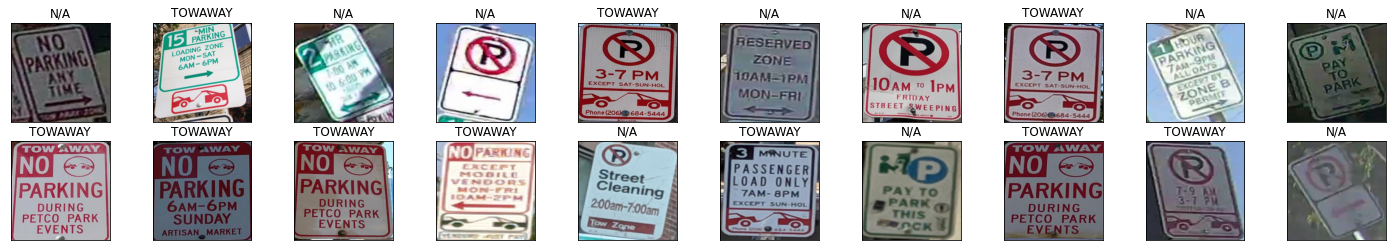

In [ ]:
train_utils.load_weights(MOBILENETV2, MODEL_DIR+"/"+MOBILENETV2+".pth")
dataviz_utils.display_dataset(train_utils)

## MobileNet V2 Results

{'BATCH_SIZE': 32, 'ETA': 0.0001, 'PATIENCE': 7, 'CROP_SIZE': 224, 'DEGREES': 20, 'HUE': 0.3, 'BRIGHTNESS': 0.2, 'SATURATION': 0.2, 'CONTRAST': 0.2, 'MONITOR': 'val_loss', 'MIN_DELTA': 0, 'LR_PATIENCE': 5, 'FACTOR': 0.5, 'INPUT_SIZE': [224, 224], 'MEAN': [0.485, 0.456, 0.406], 'STD': [0.229, 0.224, 0.225]}
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\na...
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\tow_away_zone...
119 total images loaded
Model in eval mode.
Classification Report

              precision    recall  f1-score   support

         N/A       0.94      1.00      0.97        60
     TOWAWAY       1.00      0.93      0.96        59

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119

Confusion Matrix


C:\Users\nicol\Anaconda3\envs\torch_base\lib\site-packages\pytorch_vision_utils\Utilities.py:396: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).to(device, dtype=torch.long)


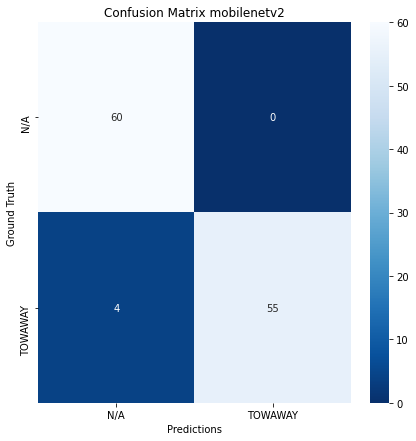

In [ ]:
dataviz_utils.display_metric_results(0, train_utils, img_dir=INC_DIR)

C:\Users\nicol\Anaconda3\envs\torch_base\lib\site-packages\pytorch_vision_utils\Utilities.py:513: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred, y_true = y_pred.argmax(dim=1).cpu().numpy(), torch.tensor(y_true).cpu().numpy()


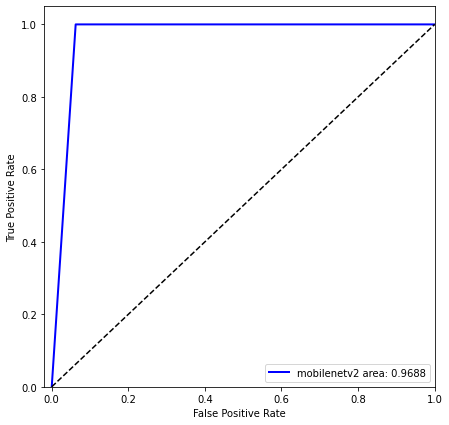

In [ ]:
dataviz_utils.display_roc_curve(0, train_utils)

In [ ]:
mobilenet_times = time_to_predict(train_utils.model, train_utils.loader, constant=CONSTANT)

Predicting...: 100%|██████████| 4/4 [00:00<00:00, 33.03it/s]


Number of Predictions:4	Classification Time Mean: 5.5053ms	Classification Time Max: 6.0060ms	Classification Time Min: 5.0050ms


## Xception Results

{'BATCH_SIZE': 16, 'ETA': 0.0001, 'PATIENCE': 7, 'CROP_SIZE': 299, 'DEGREES': 20, 'HUE': 0.3, 'BRIGHTNESS': 0.2, 'SATURATION': 0.2, 'CONTRAST': 0.2, 'MONITOR': 'val_loss', 'MIN_DELTA': 0, 'LR_PATIENCE': 5, 'FACTOR': 0.5, 'INPUT_SIZE': [299, 299], 'MEAN': [0.5, 0.5, 0.5], 'STD': [0.5, 0.5, 0.5]}
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\na...
Creating c:\Users\nicol\Documents\Development\Back-end-Symbol-Detection\TowAwayDetection\test_data\tow_away_zone...
119 total images loaded
Model in eval mode.
Classification Report

              precision    recall  f1-score   support

         N/A       1.00      1.00      1.00        60
     TOWAWAY       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

Confusion Matrix


C:\Users\nicol\Anaconda3\envs\torch_base\lib\site-packages\pytorch_vision_utils\Utilities.py:396: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_true = torch.tensor(y_true).to(device, dtype=torch.long)


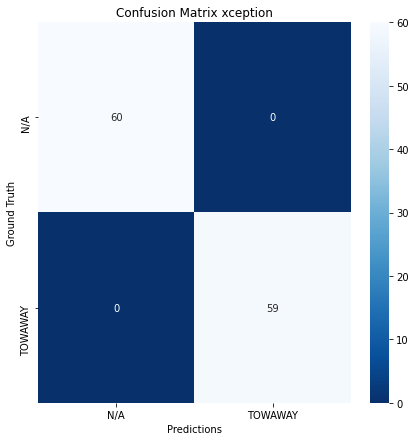

In [ ]:
train_utils.load_weights(XCEPTION, MODEL_DIR+"/"+XCEPTION+".pth")
dataviz_utils.display_metric_results(0, train_utils, img_dir=INC_DIR)

C:\Users\nicol\Anaconda3\envs\torch_base\lib\site-packages\pytorch_vision_utils\Utilities.py:513: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred, y_true = y_pred.argmax(dim=1).cpu().numpy(), torch.tensor(y_true).cpu().numpy()


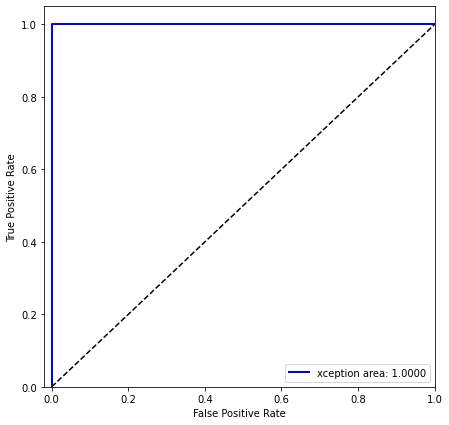

In [ ]:
dataviz_utils.display_roc_curve(0, train_utils)

In [ ]:
xception_times = time_to_predict(train_utils.model, train_utils.loader, constant=CONSTANT)

Predicting...: 100%|██████████| 8/8 [00:00<00:00, 11.84it/s]


Number of Predictions:7	Classification Time Mean: 6.4343ms	Classification Time Max: 7.0070ms	Classification Time Min: 6.0050ms


## Prediction Benchmark Graph

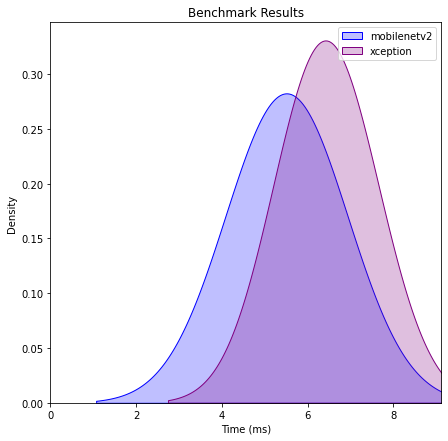

In [ ]:
dataviz_utils.display_benchmark_results(mobilenet_times, xception_times, model_name1=MOBILENETV2, model_name2=XCEPTION, bw_adjust=3)